In [1]:
import gunpowder as gp
import zarr
import matplotlib.pyplot as plt

# declare arrays to use in the pipeline
raw = gp.ArrayKey('.')

AttributeError: module 'tensorflow' has no attribute 'compat'

In [ ]:
TEST_IMAGE = "../img/img.zarr"

In [27]:
img = zarr.open(TEST_IMAGE)

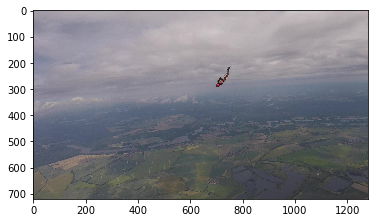

In [28]:
imgplot = plt.imshow(img[:])

In [29]:
source = gp.ZarrSource(
    TEST_IMAGE,  # the zarr container
#     {raw: 'raw'},  # which dataset to associate to the array key
    {raw: gp.ArraySpec(interpolatable=True)}  # meta-information
)

In [30]:
pipeline = source

In [31]:
request = gp.BatchRequest()

In [32]:
request[raw] = gp.Roi((0, 0), (64, 64))

In [33]:
with gp.build(pipeline):
    batch = pipeline.request_batch(request)

something went wrong during the setup of the pipeline, calling tear down


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()